In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# Multiple Linear Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load dataset
data = pd.read_csv("Advertising.csv")

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
X = data[['TV', 'Radio', 'Newspaper']]
Y = data['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 2.938889369459403
Coefficients: [ 0.04576465  0.18853002 -0.00103749]


In [14]:
Y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 3.17
R-squared Score: 0.90


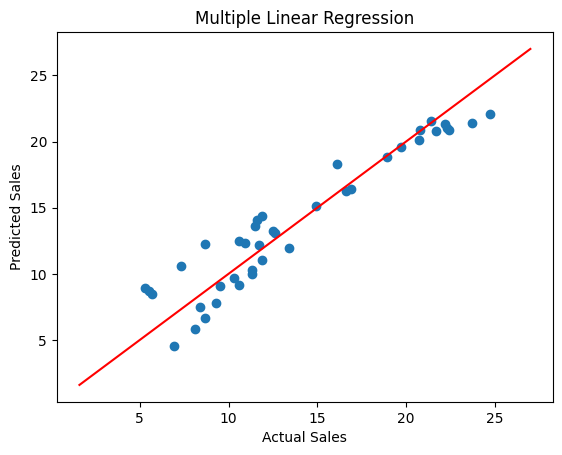

In [19]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Multiple Linear Regression")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red')
plt.show()

# Polynomial Linear Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [42]:
import pandas as pd

df = pd.read_csv("housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
X = np.array(df["median_income"][:500]).reshape(500, 1)

Y = np.array(df["housing_median_age"][:500]).reshape(500, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
# Create polynomial regression model
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train model
model.fit(X_train, Y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [68]:
Y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 102.15
R-squared Score: -0.08


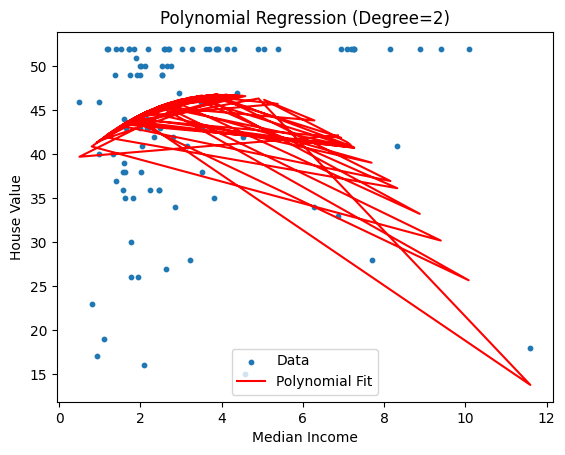

In [70]:
plt.scatter(X_test, Y_test, s=10, label='Data')
plt.plot(X_test, Y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.legend()
plt.title('Polynomial Regression (Degree=2)')
plt.show()

# Ridge and Lasso Regressions

In [78]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [107]:
X = df.drop(columns =['Outcome'])
Y = df.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [109]:
# Simple model
model = LinearRegression()
model.fit(X_train, Y_train)

# Create a DataFrame to display coefficients nicely
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("Linear Regression Coefficients:\n")
print(coef_df.to_string(index=False))

Linear Regression Coefficients:

                 Feature  Coefficient
             Pregnancies     0.010468
                 Glucose     0.005634
           BloodPressure    -0.002281
           SkinThickness     0.000532
                 Insulin    -0.000278
                     BMI     0.015039
DiabetesPedigreeFunction     0.111263
                     Age     0.006460


In [111]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

# Create a DataFrame to display coefficients nicely
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
})

print("Ridge Regression Coefficients:\n")
print(coef_df.to_string(index=False))

Ridge Regression Coefficients:

                 Feature  Coefficient
             Pregnancies     0.010459
                 Glucose     0.005635
           BloodPressure    -0.002281
           SkinThickness     0.000537
                 Insulin    -0.000278
                     BMI     0.015042
DiabetesPedigreeFunction     0.109595
                     Age     0.006462


In [112]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

# Create a DataFrame to display coefficients nicely
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
})

print("Lasso Regression Coefficients:\n")
print(coef_df.to_string(index=False))

Lasso Regression Coefficients:

                 Feature  Coefficient
             Pregnancies     0.000000
                 Glucose     0.005749
           BloodPressure    -0.001581
           SkinThickness     0.000427
                 Insulin    -0.000231
                     BMI     0.013551
DiabetesPedigreeFunction     0.000000
                     Age     0.007084
